# Inspección y analisis de datos

# (Explica que chingados hicieron)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public', theme='space', offline='True')

In [52]:
dt=glob.glob('2023*.csv')

In [53]:
dat=[]
for files in dt:
    dat.append(pd.read_csv(files))
dat2=pd.concat(dat,ignore_index=True)

In [54]:
Time=pd.to_datetime(dat2['Datetime'][:], format="%Y-%m-%d %H:%M:%S")

In [55]:
datos=dat2.drop(['Datetime'], axis=1)

In [56]:
datos.insert(0,"Time",Time,True)

In [57]:
dates=datos.sort_values(by=['Time'], ignore_index=True)

In [58]:
dates["Presion"].replace(0, np.nan, inplace=True)

# (Explica el problema de la interpolación)

In [59]:
for i in dates.Presion:
    Val = dates['Presion'].mean()
    dates['Presion'].fillna(value=Val, inplace=True)
print(dates)

                    Time  Humedad   Temperatura     Presion
0    2023-10-04 09:42:03    58.66         28.72  814.728956
1    2023-10-04 10:12:30    39.22         38.66  810.820000
2    2023-10-04 10:43:06    36.35         40.07  810.910000
3    2023-10-04 11:13:41    35.29         40.18  811.080000
4    2023-10-04 11:44:17    34.28         40.37  811.220000
...                  ...      ...           ...         ...
1355 2023-11-05 22:00:02    42.96         32.17  812.600000
1356 2023-11-05 22:30:01    42.81         32.04  812.760000
1357 2023-11-05 23:00:02    44.57         31.64  813.030000
1358 2023-11-05 23:30:02    42.45         31.97  813.390000
1359                 NaT    47.12         31.59  814.728956

[1360 rows x 4 columns]


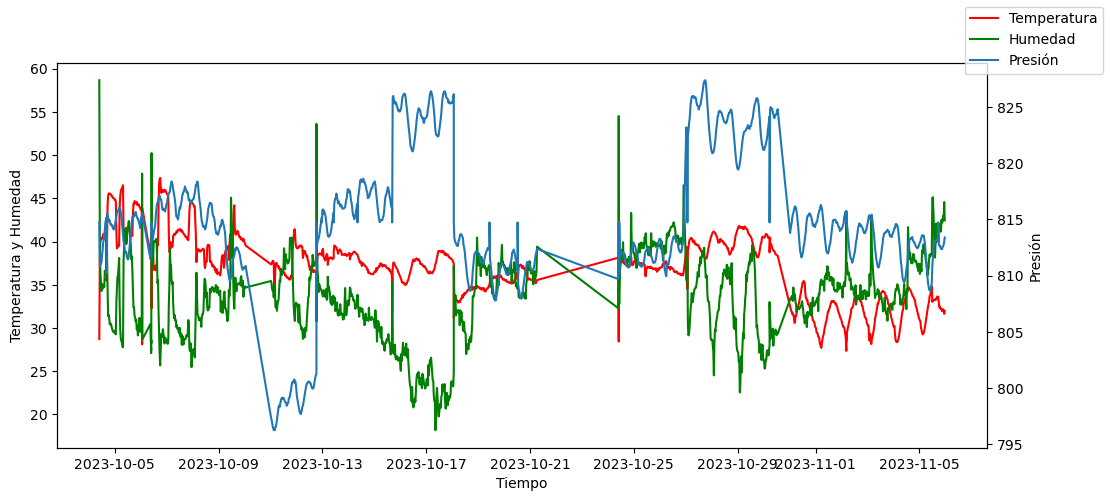

In [27]:
figure, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura y Humedad")
ax1.plot(dates['Time'], dates[" Temperatura"], label="Temperatura", color="r")
ax1.plot(dates["Time"], dates["Humedad"], label="Humedad", color="g")
ax2=ax1.twinx()
ax2.set_ylabel("Presión")
ax2.plot(dates['Time'], dates["Presion"],label="Presión")
figure.legend()

# -Ambiente de pruebas-

In [61]:
datt=dates.drop(['Time'], axis=1)
datt

,Humedad,Temperatura,Presion
0,58.66,28.72,814.728956
1,39.22,38.66,810.820000
2,36.35,40.07,810.910000
3,35.29,40.18,811.080000
4,34.28,40.37,811.220000
...,...,...,...
1355,42.96,32.17,812.600000
1356,42.81,32.04,812.760000
1357,44.57,31.64,813.030000
1358,42.45,31.97,813.390000


In [60]:
datt["Presion"].replace(0, np.nan, inplace=True)

In [42]:
for i in datt.Presion:
    Val = datt['Presion'].mean()
    datt['Presion'].fillna(value=Val, inplace=True) #Concatenación 
print(datt)

      Humedad   Temperatura     Presion
0       58.66         28.72  814.728956
1       39.22         38.66  810.820000
2       36.35         40.07  810.910000
3       35.29         40.18  811.080000
4       34.28         40.37  811.220000
...       ...           ...         ...
1355    42.96         32.17  812.600000
1356    42.81         32.04  812.760000
1357    44.57         31.64  813.030000
1358    42.45         31.97  813.390000
1359    47.12         31.59  814.728956

[1360 rows x 3 columns]


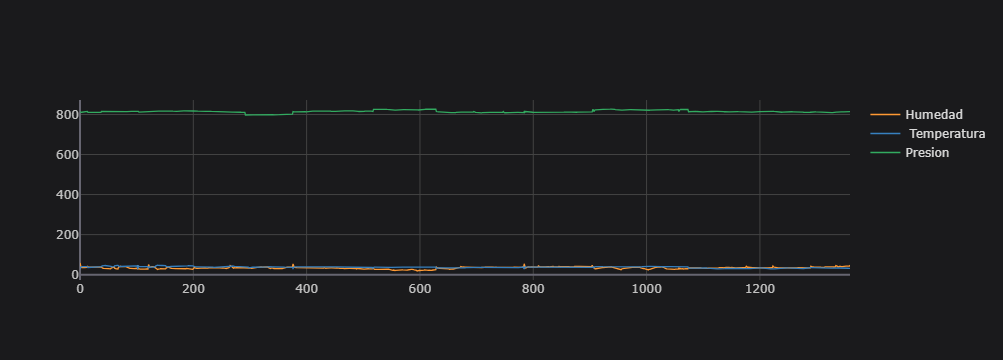

In [63]:
datt.iplot(kind='line')

### Ya salio si le quito la columna de 'Time' al CSV, ahora ver como fregados poner la columna de tiempo sin que se alteren los datos 

### Bueno... ya funciono pero sin el Tiempo... aun no entiendo exactamente como funciono pero ok, ahora tengo que intentar meterle la columna de tiempo y que me grafique los datos respecto a esto. 
### Analisandolo bien, el problema es que la garfica toma la primera columna (que va de 0,1,2,...,1359) como el tiempo en el eje Y, tengo que hacer que omita eso y ponga el tiempo

# -Fin de ambiente de pruebas-

# (Explica como seran los histogramas y el porque los muestras)